In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
import keras 
from keras.models import Sequential
from keras.layers import Dropout,Dense,SimpleRNN,LSTM
from keras.optimizers import Adam
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("META.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700
1,2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000
2,2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500
3,2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600
4,2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000


In [4]:
data.shape

(1257, 7)

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
data['Date']=pd.to_datetime(data['Date'])

In [8]:
# spliting data into training and validation

In [9]:
len_data=len(data)
split_ratio=0.8
len_train=round(len_data*split_ratio)
len_val=len_data-len_train

In [10]:
print("len_data:",len_data)
print("len_train:",len_train)
print("len_val:",len_val)


len_data: 1257
len_train: 1006
len_val: 251


In [11]:
train_data=data[:len_train].iloc[:,:2]

In [12]:
train_data.head()

,Date,Open
0,2018-10-01,163.029999
1,2018-10-02,161.580002
2,2018-10-03,160.000000
3,2018-10-04,161.460007
4,2018-10-05,159.210007


In [13]:
train_data.shape

(1006, 2)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1006 non-null   datetime64[ns]
 1   Open    1006 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [15]:
validation_data=data[len_train:].iloc[:,:2]

In [16]:
validation_data.head()

,Date,Open
1006,2022-09-29,139.360001
1007,2022-09-30,136.050003
1008,2022-10-03,137.139999
1009,2022-10-04,140.490005
1010,2022-10-05,138.240005


In [17]:
validation_data.shape

(251, 2)

In [18]:
dataset_train=train_data.Open.values
dataset_train.shape

(1006,)

In [30]:
# reshape
dataset_train=dataset_train.reshape(-1,1)
dataset_train.shape

(1006, 1)

In [34]:
scaler=MinMaxScaler()
dataset_train_scale=scaler.fit_transform(dataset_train)

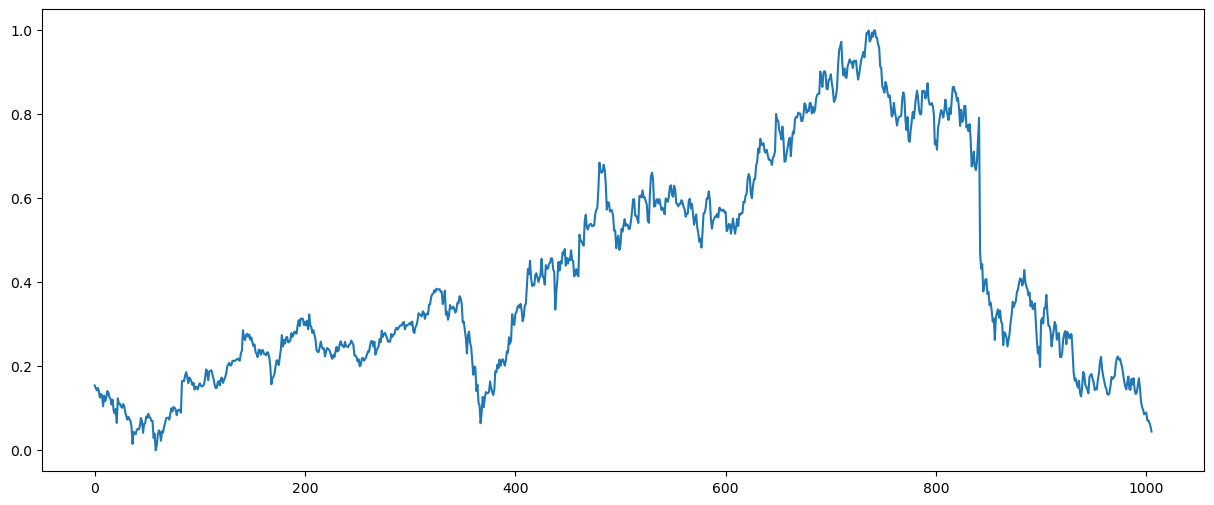

In [42]:
plt.figure(figsize=(15,6))
plt.plot(dataset_train_scale)
plt.show()

In [58]:
x_train=[]
y_train=[]

time_step=50

for i in range(time_step,len_train):
    x_train.append(dataset_train_scale[i-time_step:i,0])
    y_train.append(dataset_train_scale[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [60]:
x_train.shape

(956, 50)

In [64]:
y_train.shape

(956,)

In [66]:
# reshape and expand dim

In [74]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [76]:
print(x_train.shape)
print(y_train.shape)

(956, 50, 1)
(956, 1)


In [92]:
rnn=Sequential()

rnn.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
rnn.add(Dropout(rate=0.1))

rnn.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
rnn.add(Dropout(rate=0.1))

rnn.add(SimpleRNN(units=50))
rnn.add(Dropout(rate=0.1))

rnn.add(Dense(units=1))

In [94]:
rnn.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [96]:
history=rnn.fit(x_train,y_train,epochs=50,batch_size=30)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 2.3797e-04 - loss: 0.3767
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0028 - loss: 0.1179
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0013 - loss: 0.0826
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0025 - loss: 0.0610
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 4.9724e-04 - loss: 0.0415
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0016 - loss: 0.0314
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0029 - loss: 0.0269
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0012 - loss: 0.0200
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0017 - loss: 0.0185
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0014 - loss: 0.0210 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0011 - loss: 0.0164  
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 

In [100]:
y_pred=rnn.predict(x_train)
y_pred=scaler.inverse_transform(y_pred)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [102]:
y_train=scaler.inverse_transform(y_train)

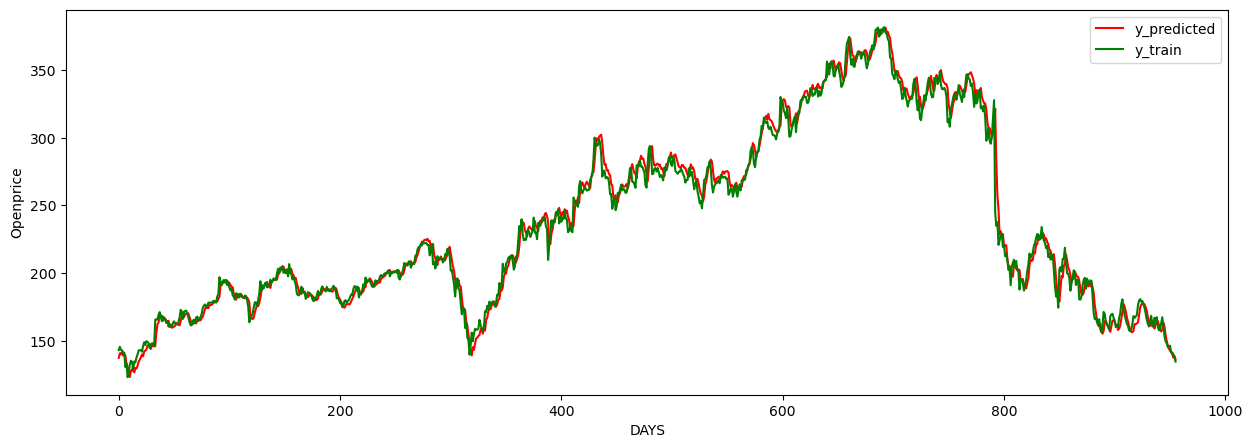

In [156]:
plt.figure(figsize=(15,5))
plt.plot(y_pred,color='r',label='y_predicted')
plt.plot(y_train,color='g',label='y_train')
plt.xlabel('DAYS')
plt.ylabel('Openprice')
plt.legend()
plt.show()

In [118]:
# model evalution on validation data

In [128]:
dataset_validation=validation_data.Open.values
dataset_validation=dataset_validation.reshape(-1,1)
dataset_validation_scale=scaler.fit_transform(dataset_validation)
dataset_validation_scale.shape

(251, 1)

In [134]:
x_test=[]
y_test=[]

time_step=50

for i in range(time_step,len_val):
    x_test.append(dataset_validation_scale[i-time_step:i,0])
    y_test.append(dataset_validation_scale[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)

In [138]:
print(x_test.shape)
print(y_test.shape)

(201, 50)
(201,)


In [142]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test=np.reshape(y_test,(-1,1))

In [144]:
print(x_test.shape)
print(y_test.shape)

(201, 50, 1)
(201, 1)


In [150]:
y_pred_test=rnn.predict(x_test)
y_pred_test=scaler.inverse_transform(y_pred_test)
y_test=scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


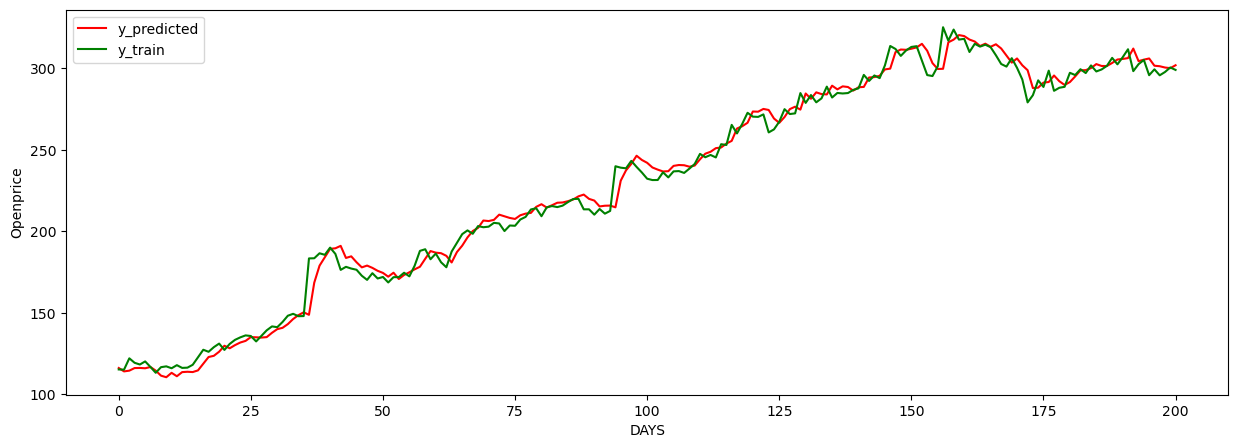

In [154]:
plt.figure(figsize=(15,5))
plt.plot(y_pred_test,color='r',label='y_predicted')
plt.plot(y_test,color='g',label='y_train')
plt.xlabel('DAYS')
plt.ylabel('Openprice')
plt.legend()
plt.show()

In [170]:
rnn_lstm=Sequential()

rnn_lstm.add(LSTM(units=64,return_sequences=True,input_shape=(x_train.shape[1],1)))

rnn_lstm.add(LSTM(units=64,return_sequences=True))

rnn_lstm.add(Dense(units=1))

In [172]:
rnn_lstm.compile(optimizer='adam',loss='mean_squared_error')

In [174]:
hist=rnn_lstm.fit(x_train,y_train,epochs=40,batch_size=30)

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 57196.5430
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 55957.2305
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 53715.7695
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 54102.5195
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 54869.7500
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 52446.9883
Epoch 7/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 49646.6562
Epoch 8/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 50266.0742
Epoch 9/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 48654.5586
Epoch 10/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 48929.5039
Epoch 11/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 47620.8906
Epoch 12/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 46361.3203
Epoch 13/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 45273.9922
Epoch 14/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 46189.0625
Epoch 15/40
32/

In [182]:
x_input=data[-time_step:].Open.values
x_input=scaler.fit_transform(x_input.reshape(-1,1))
x_input=x_input.reshape(1,50,1)
x_input.shape

(1, 50, 1)

In [190]:
simple_pred=scaler.inverse_transform(rnn.predict(x_input))
simple_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[298.46875]], dtype=float32)

In [192]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-09-22,299.299988,305.380005,298.269989,299.079987,299.079987,25351400
1253,2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000
1254,2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200
1255,2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800
1256,2023-09-28,298.940002,306.329987,296.700012,303.959991,303.959991,22140800
